[anaStruct](https://github.com/ritchie46/anaStruct) is a python library for the analysis of 2D Frames and trusses. For more information please visit the [anaStruct’s documentation](https://anastruct.readthedocs.io/en/latest/).

In [8]:
import math 
import numpy as np
import matplotlib.pyplot as plt
from anastruct.fem.system import SystemElements

## Standerd Elements

Standard elements have bending and axial stiffness and therefore will implement shear force, bending moment, axial force, extension, and deflection.

### Example 1

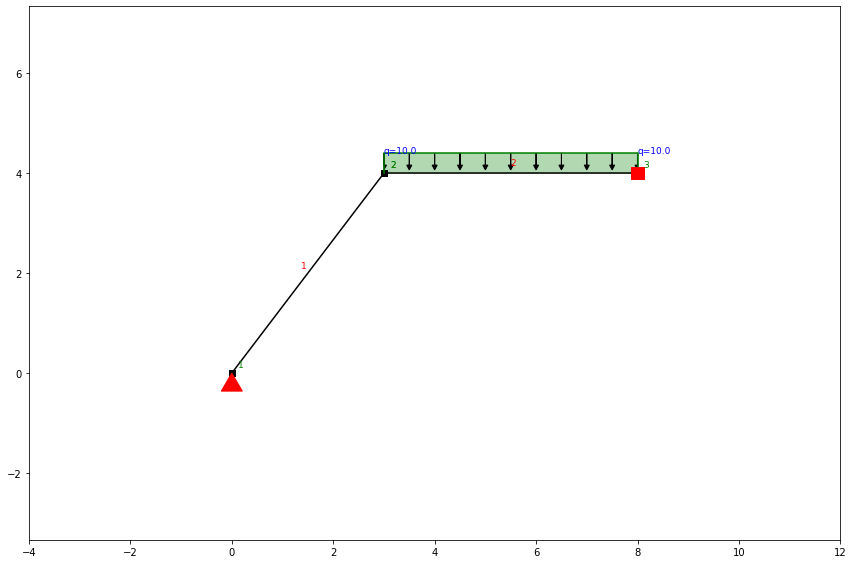

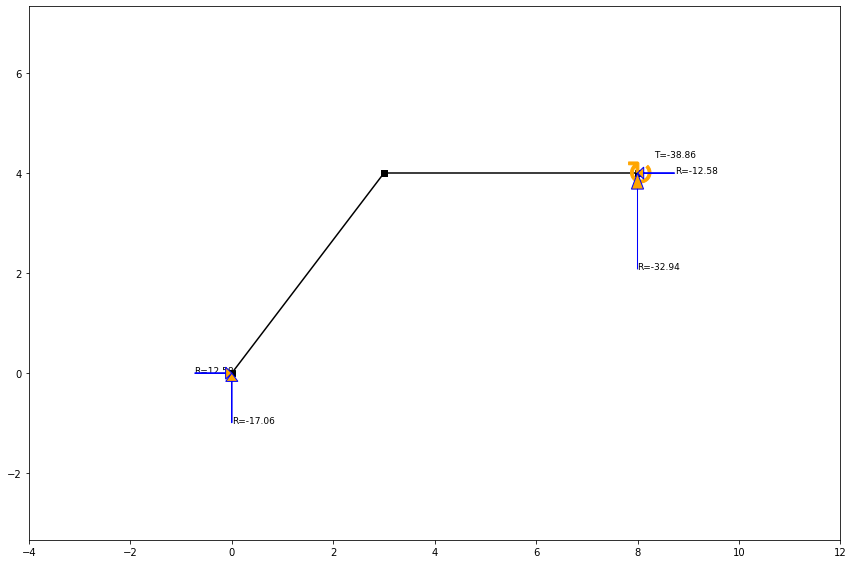

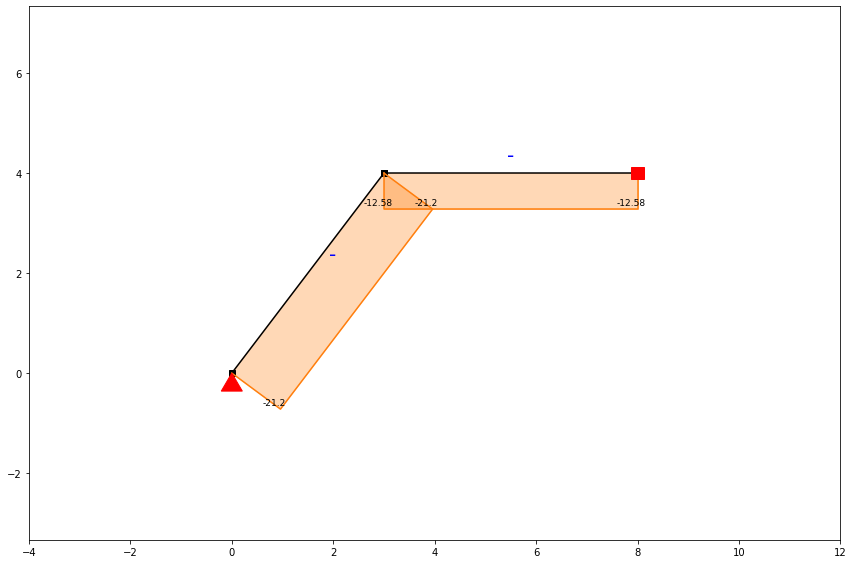

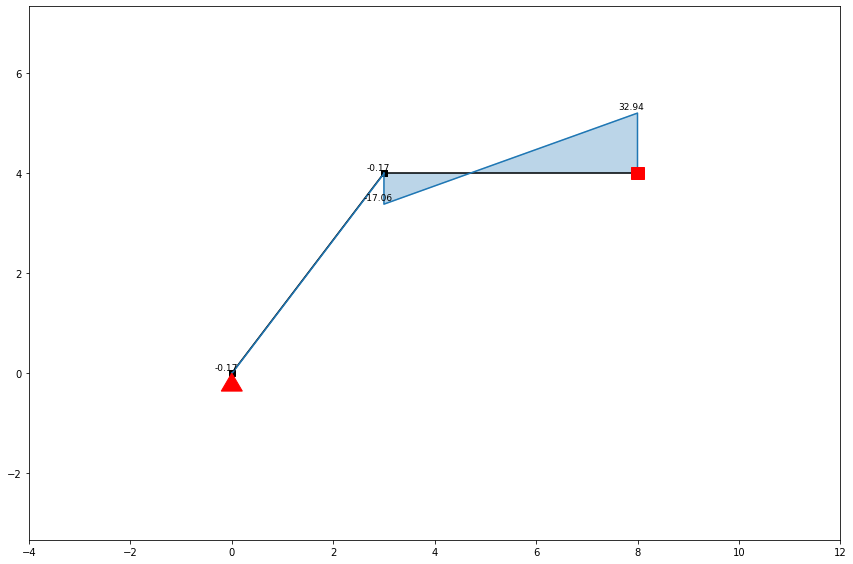

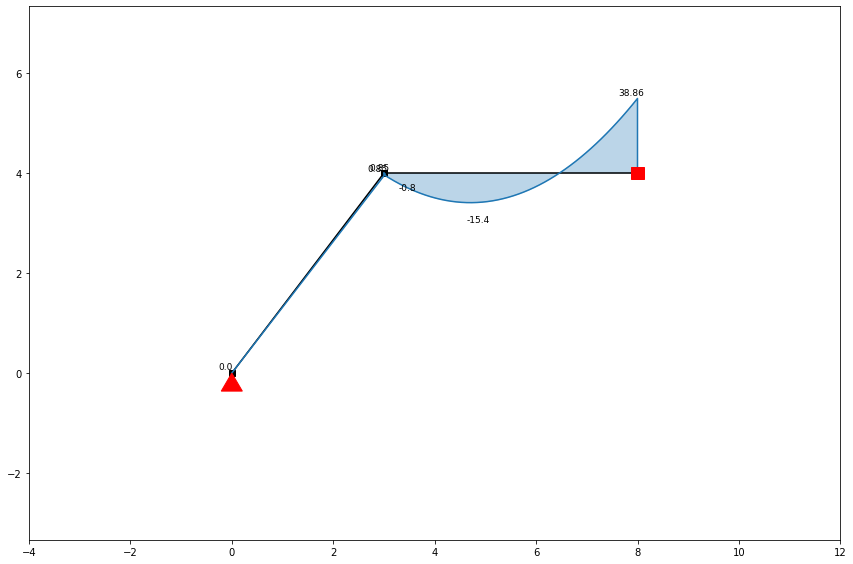

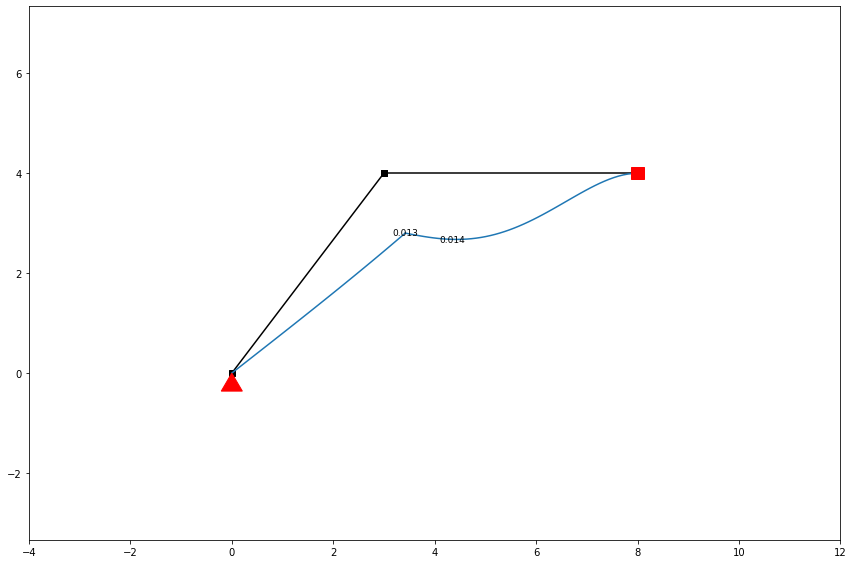

In [4]:
ss = SystemElements()

# Add beams to the system.
ss.add_element(location=[[0, 0], [3, 4]])
ss.add_element(location=[[3, 4], [8, 4]])

# Add supports.
ss.add_support_hinged(node_id=1)
ss.add_support_fixed(node_id=3)

# Add loads.
ss.q_load(element_id=2, q=-10)

# Solve
ss.solve()

# Get visual results.
ss.show_structure()
ss.show_reaction_force()
ss.show_axial_force()
ss.show_shear_force()
ss.show_bending_moment()
ss.show_displacement()

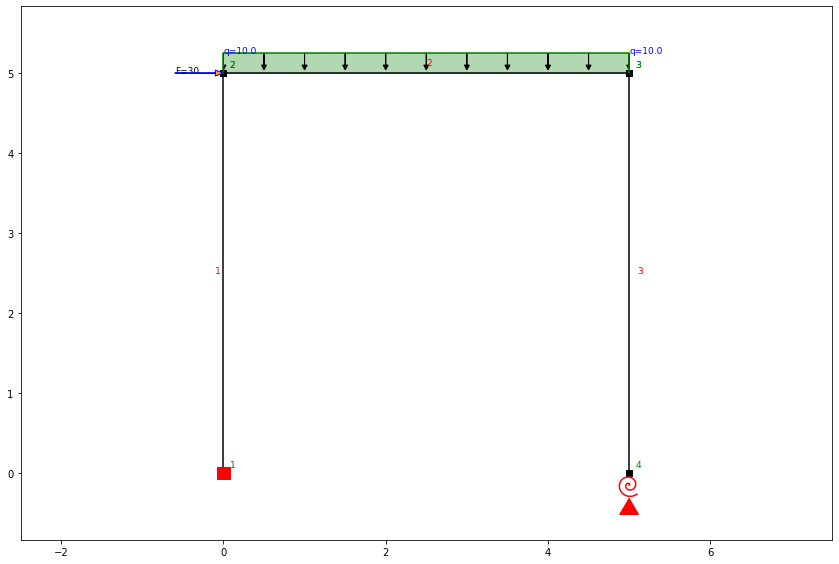

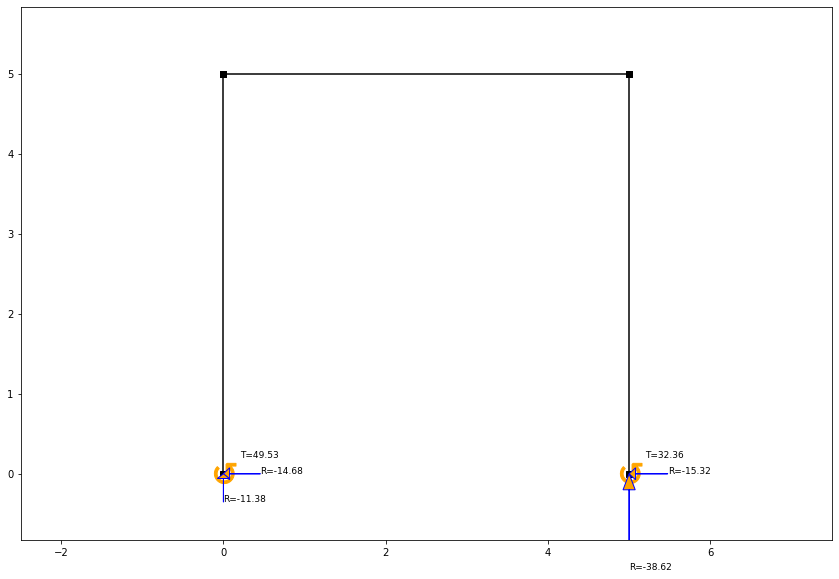

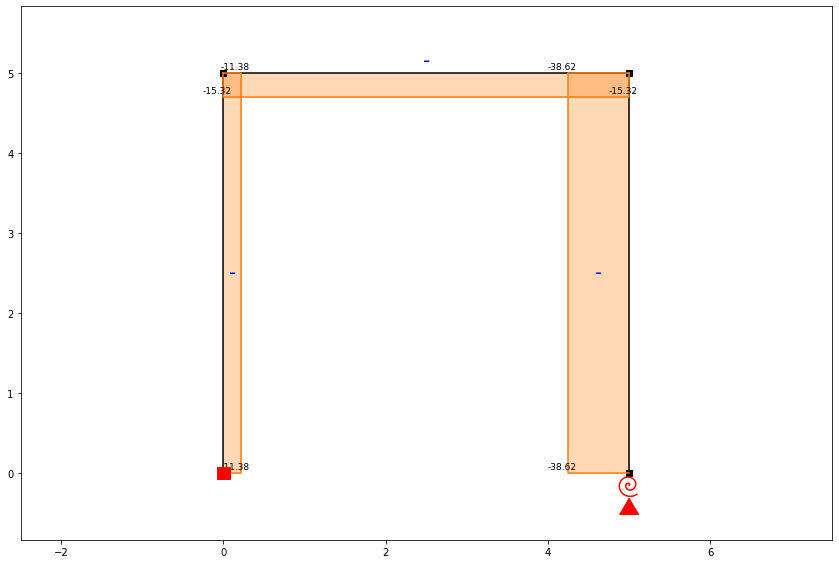

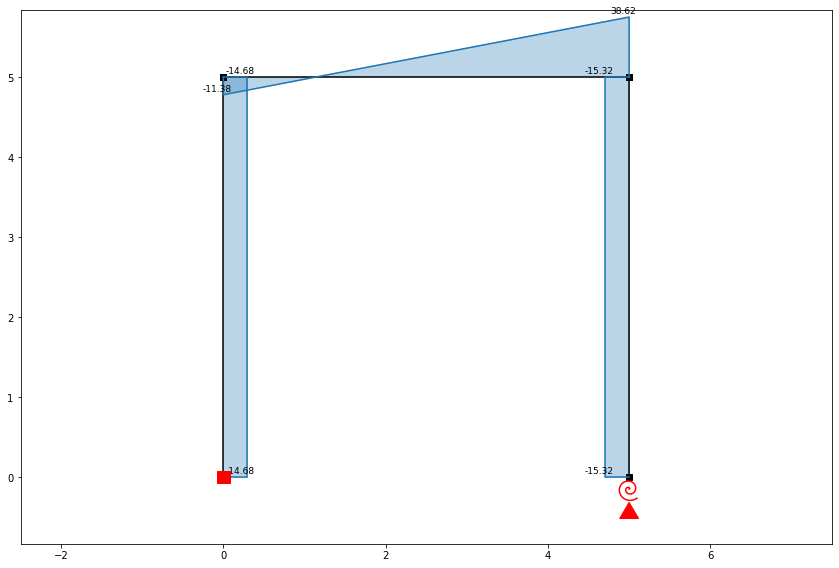

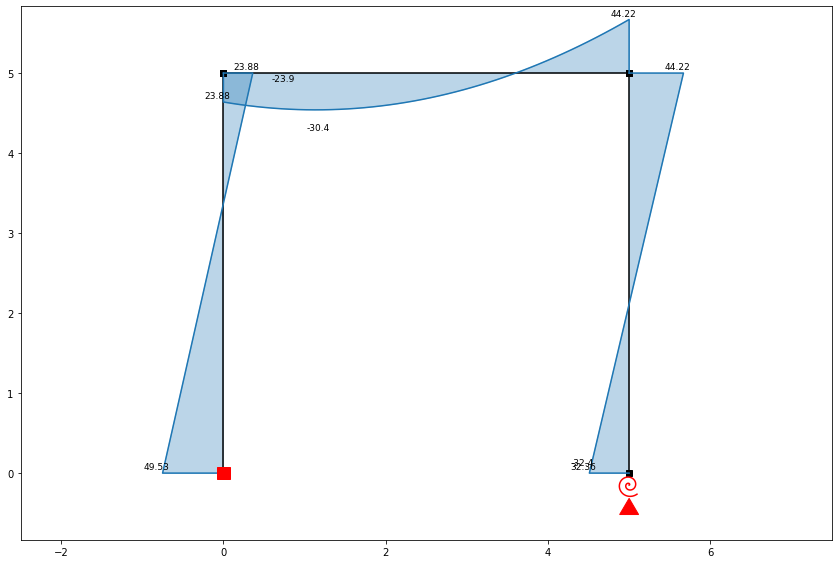

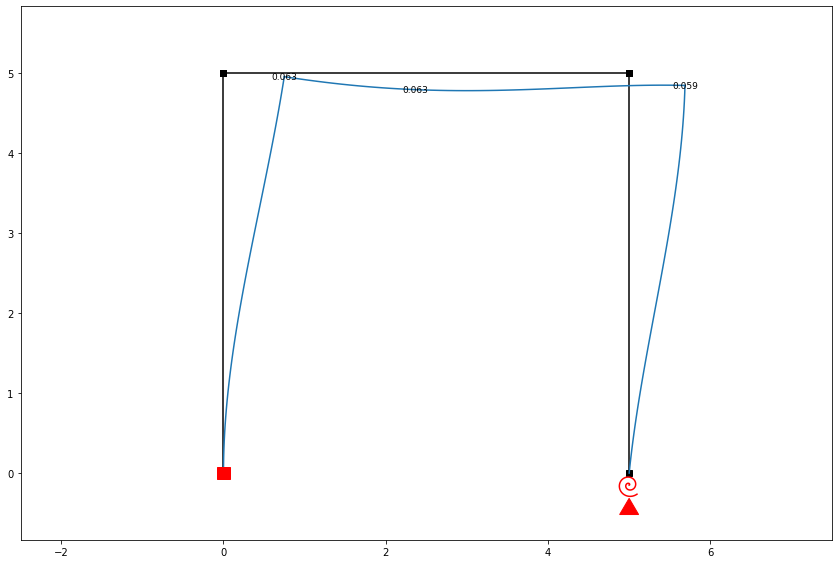

In [5]:
ss = SystemElements(EA=15000, EI=5000)

# Add beams to the system.
ss.add_element(location=[0, 5])
ss.add_element(location=[[0, 5], [5, 5]])
ss.add_element(location=[[5, 5], [5, 0]])

# Add a fixed support at node 1.
ss.add_support_fixed(node_id=1)

# Add a rotational spring support at node 4.
ss.add_support_spring(node_id=4, translation=3, k=4000)

# Add loads.
ss.point_load(Fx=30, node_id=2)
ss.q_load(q=-10, element_id=2)

# Solve
ss.solve()

# Get visual results.
ss.show_structure()
ss.show_reaction_force()
ss.show_axial_force()
ss.show_shear_force()
ss.show_bending_moment()
ss.show_displacement()

## Truss Elements

Truss elements don’t have bending stiffness and will therefore not implement shear force, bending moment and deflection. It does model axial force and extension.

### Example 1

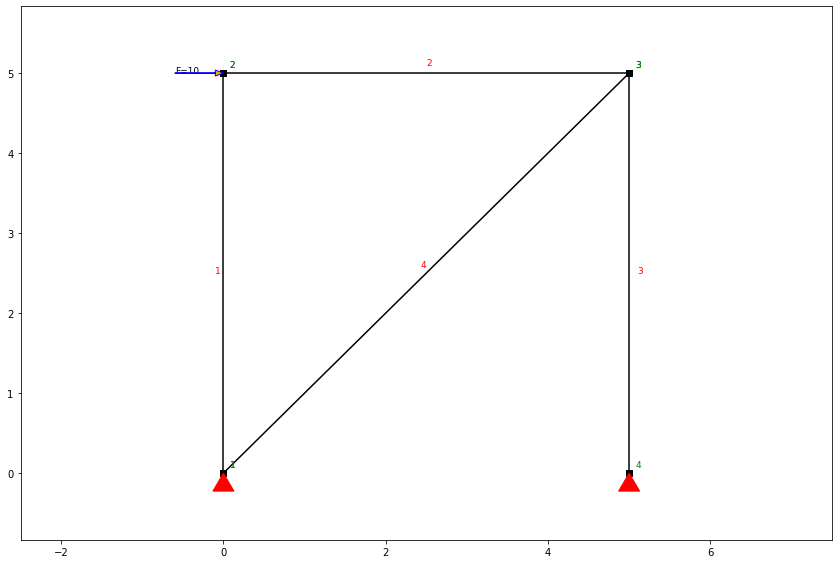

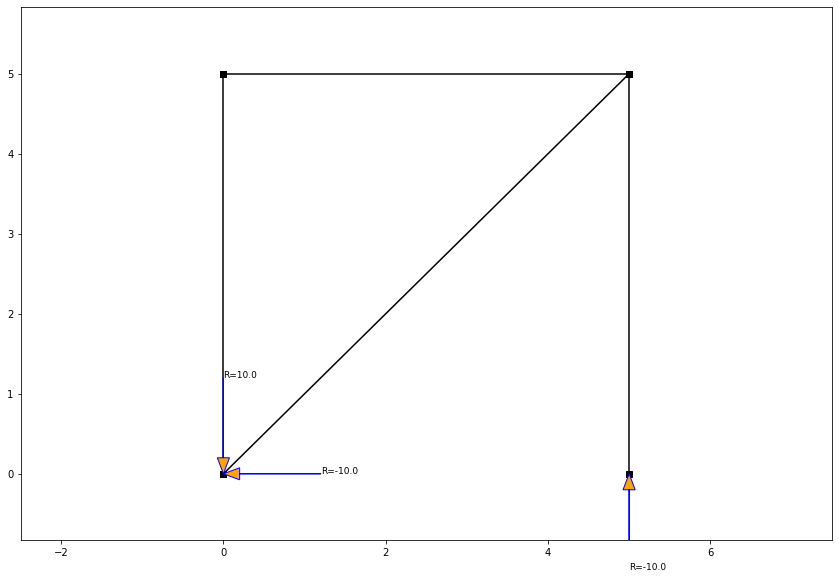

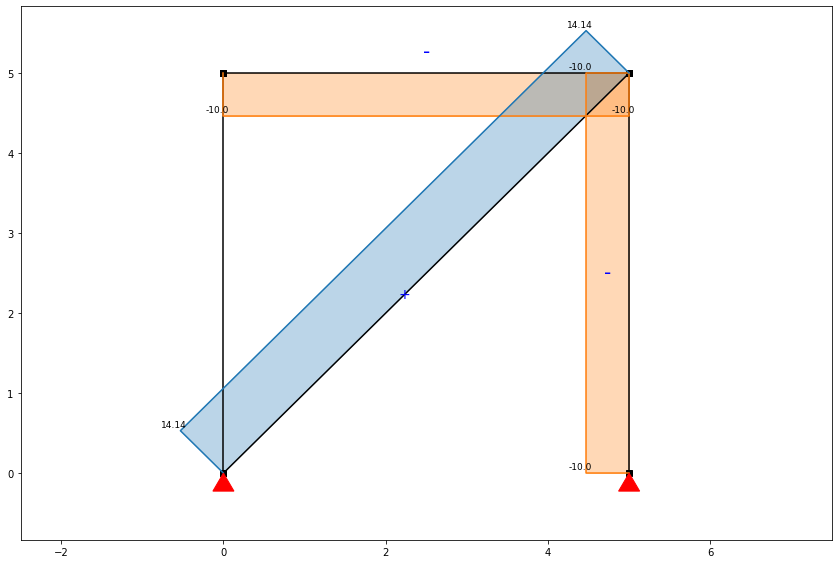

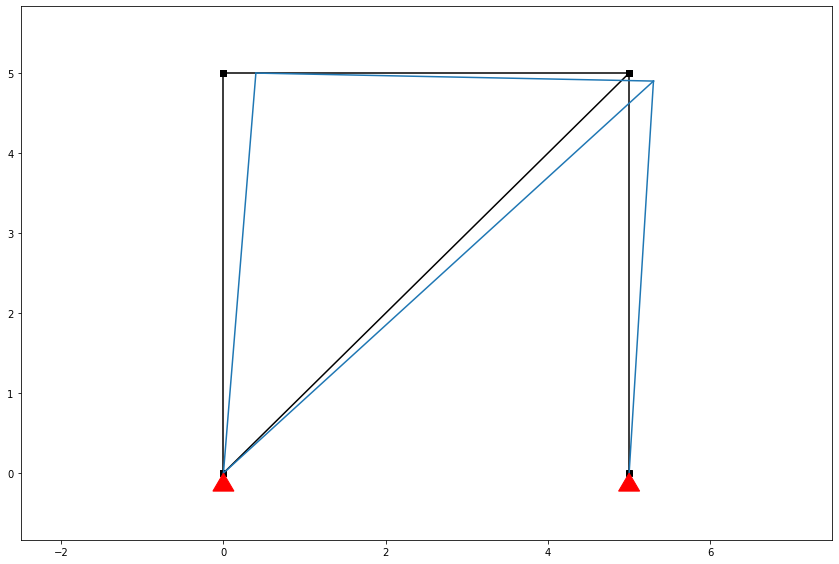

In [6]:
ss = SystemElements(EA=5000)
ss.add_truss_element(location=[[0, 0], [0, 5]])
ss.add_truss_element(location=[[0, 5], [5, 5]])
ss.add_truss_element(location=[[5, 5], [5, 0]])
ss.add_truss_element(location=[[0, 0], [5, 5]], EA=5000 * math.sqrt(2))

ss.add_support_hinged(node_id=1)
ss.add_support_hinged(node_id=4)

ss.point_load(Fx=10, node_id=2)

ss.show_structure()

ss.solve()

ss.show_reaction_force()
ss.show_axial_force()
ss.show_displacement(factor=10)

### Example 2

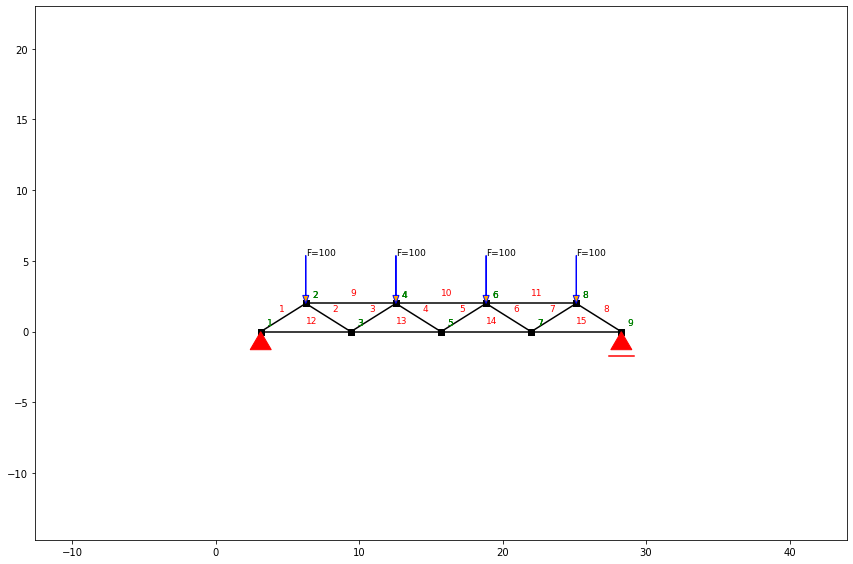

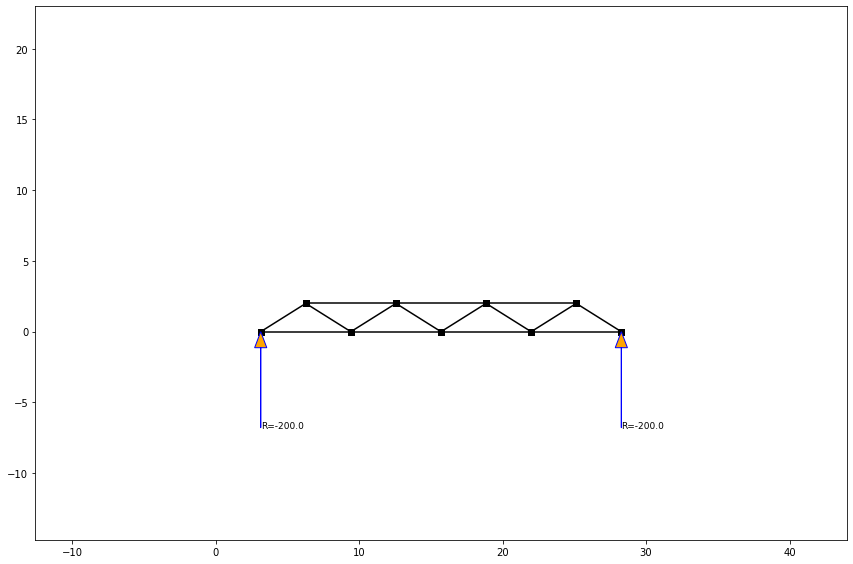

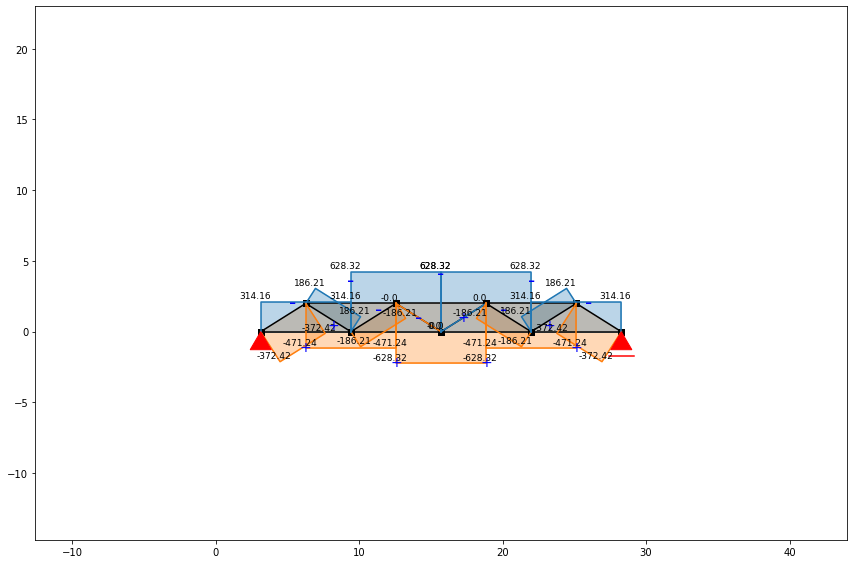

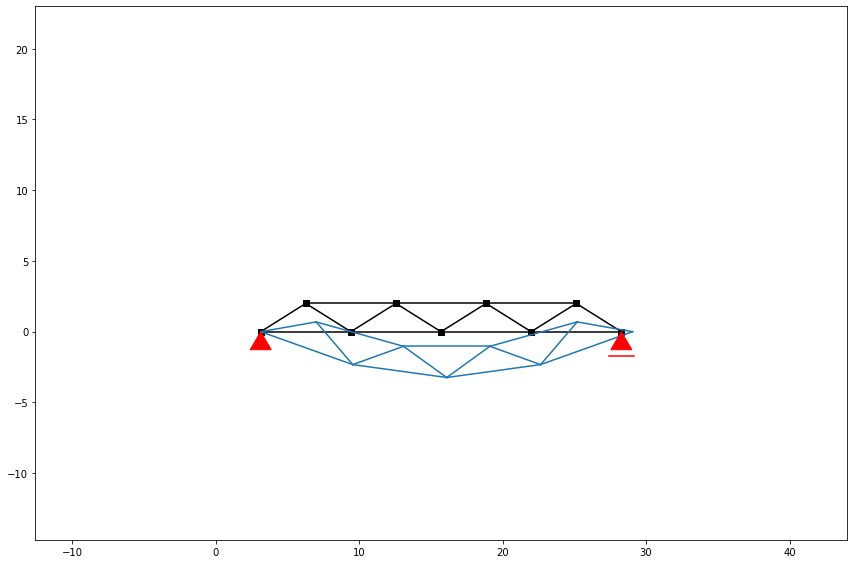

In [12]:
ss = SystemElements()
element_type = 'truss'

# create triangles
x = np.arange(1, 10) * np.pi
y = np.cos(x)
y -= y.min()
ss.add_element_grid(x, y, element_type=element_type)

# add top girder
ss.add_element_grid(x[1:-1][::2], np.ones(x.shape) * y.max(), element_type=element_type)

# add bottom girder
ss.add_element_grid(x[::2], np.ones(x.shape) * y.min(), element_type=element_type)

# supports
ss.add_support_hinged(1)
ss.add_support_roll(-1, 2)

# loads
ss.point_load(node_id=np.arange(2, 9, 2), Fy=-100)

ss.solve()
ss.show_structure()

ss.show_reaction_force()
ss.show_axial_force()
ss.show_displacement(factor=1)